**Import libraries**

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Upload Dataset**

In [203]:
import pandas as pd

df = pd.read_csv(r'E:\titanic_train.csv', encoding='unicode_escape')


In [204]:
df.shape


(891, 12)

In [205]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Categorical Columns**

1. Survived
2. PClass
3. Sex
4. SibSp
5. Parch
6. Embarked

**Numerical Columns**

1. Age
2. Fare
3. Passengerld


**Mixed Columns**

1. Name
2. Ticket
3. Cabin

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [209]:
df.drop(columns=['Cabin'],inplace=True)

In [210]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [211]:
df['Embarked'].value_counts()
df['Embarked'] = df['Embarked'].fillna('S')


In [212]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [213]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

**Changing data type for the following cols.**

1. Survived(category)
2. PClass(category)
3. Sex(category)
4. Age(category)
5. Embarked(category)

In [214]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [215]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [216]:
df.describe()


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891, 62% of people died in the accident


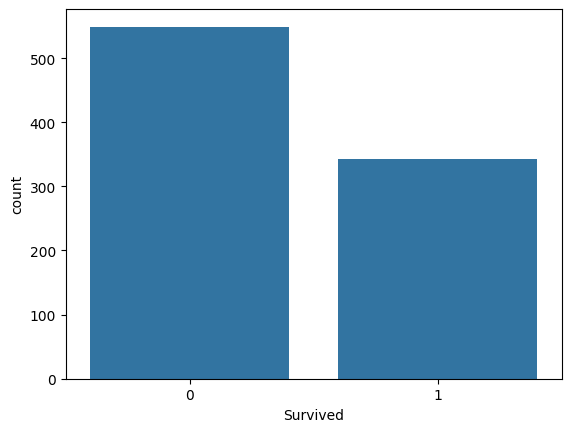

In [217]:
# Create the count plot
sns.countplot(x='Survived', data=df)

# Calculate the percentage of people who died
death_percent = round((df['Survived'].value_counts().values[0] / 891) * 100)

# Print the result
print("Out of 891, {}% of people died in the accident".format(death_percent))

# Show the plot
plt.show()

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


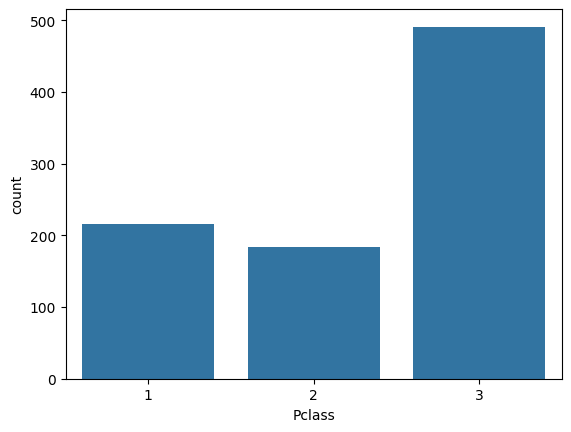

In [218]:
# Calculate and print the percentage of each class
print((df['Pclass'].value_counts() / 891) * 100)

# Create the count plot with Pclass on the x-axis
sns.countplot(x='Pclass', data=df)

# Show the plot
plt.show()


Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

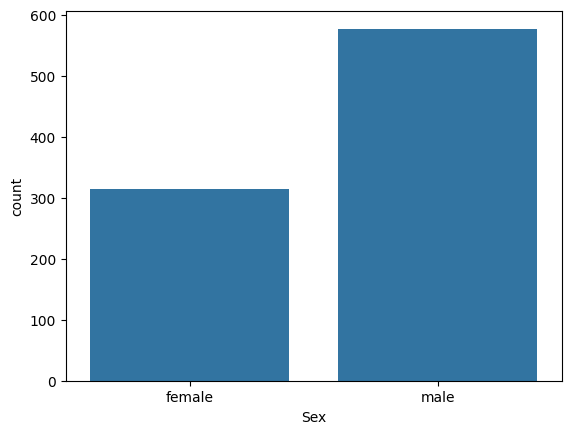

In [219]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x= 'Sex',data =df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

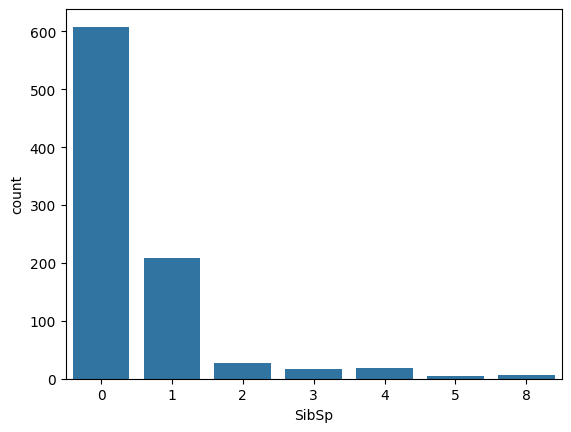

In [220]:
print(df['SibSp'].value_counts())

sns.countplot(x= 'SibSp',data=df)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

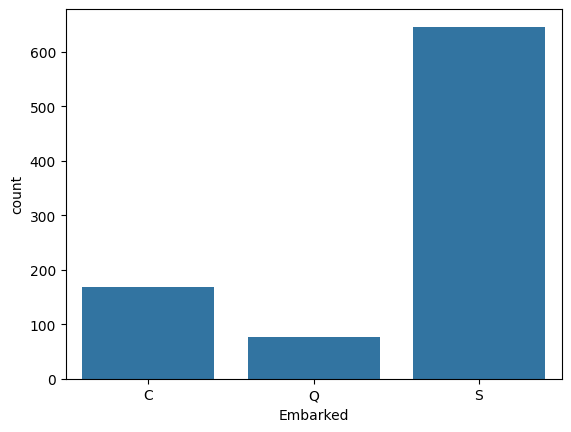

In [221]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x='Embarked',data=df)

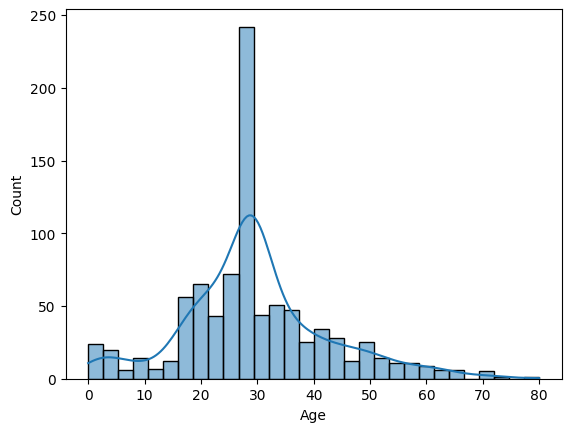

Skewness of Age: 0.45956263424701577
Kurtosis of Age: 0.9865867453652877


In [222]:
# Age column

# Plotting the distribution of 'Age' using histplot
sns.histplot(df["Age"], kde=True)

# Show the plot
plt.show()

# Calculate and print the skewness and kurtosis of 'Age'
print("Skewness of Age:", df['Age'].skew())
print("Kurtosis of Age:", df['Age'].kurt())

<Axes: xlabel='Age'>

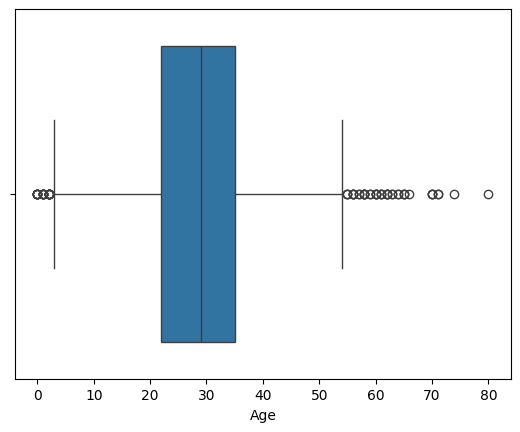

In [223]:
sns.boxplot(x='Age',data=df)


In [224]:

# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


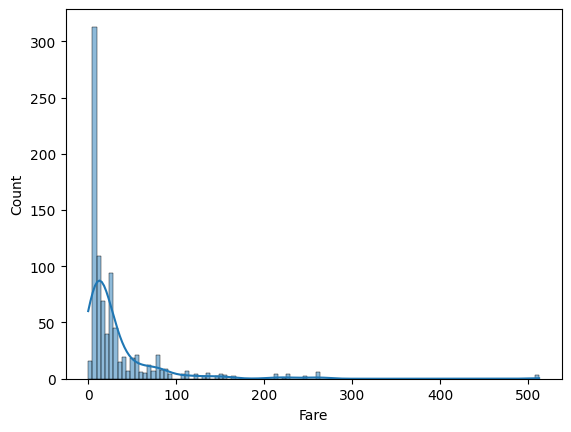

In [225]:

# Fare column

# Plotting the distribution of 'Fare' using histplot
sns.histplot(df['Fare'], kde=True)

# Show the plot
plt.show()

In [226]:
print(df['Fare'].skew())
print(df['Fare'].kurt())


4.787316519674893
33.39814088089868


<Axes: xlabel='Fare'>

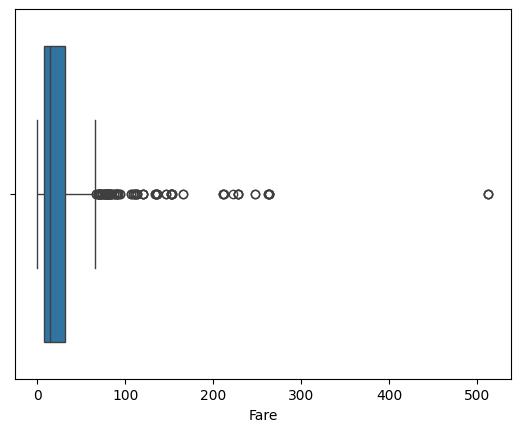

In [227]:
sns.boxplot(x='Fare', data=df)


In [228]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


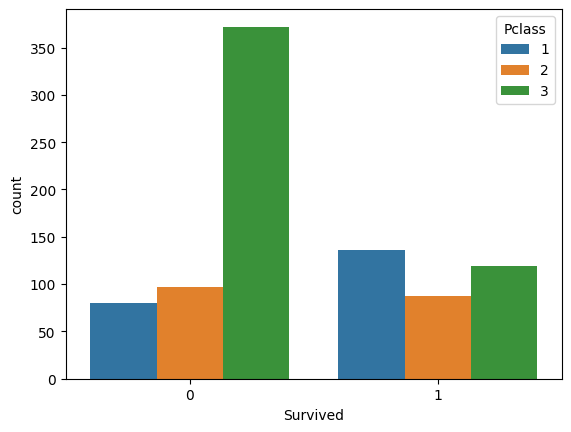

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


In [229]:
# Multivariate Analysis

# Survival with Pclass

# Corrected countplot with 'Survived' on x-axis and 'Pclass' as the hue
sns.countplot(x='Survived', hue='Pclass', data=df)

# Show the plot
plt.show()

# Crosstab to show the percentage of survivors by class
survival_rate_by_class = pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(survival_rate_by_class)

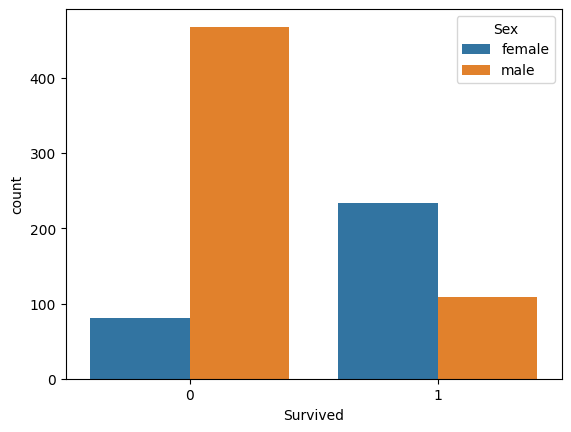

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


In [230]:
# Survival with Sex

# Corrected countplot with 'Survived' on x-axis and 'Sex' as the hue
sns.countplot(x='Survived', hue='Sex', data=df)

# Show the plot
plt.show()

# Crosstab to show the percentage of survivors by sex
survival_rate_by_sex = pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)
print(survival_rate_by_sex)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


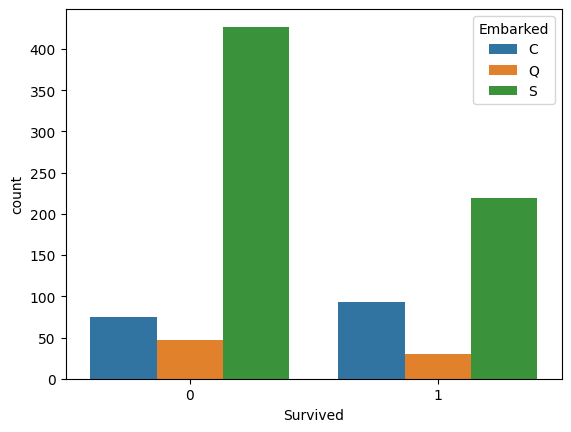

In [231]:
# Survival with Embarked

sns.countplot(x='Survived', hue='Embarked',data=df)

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

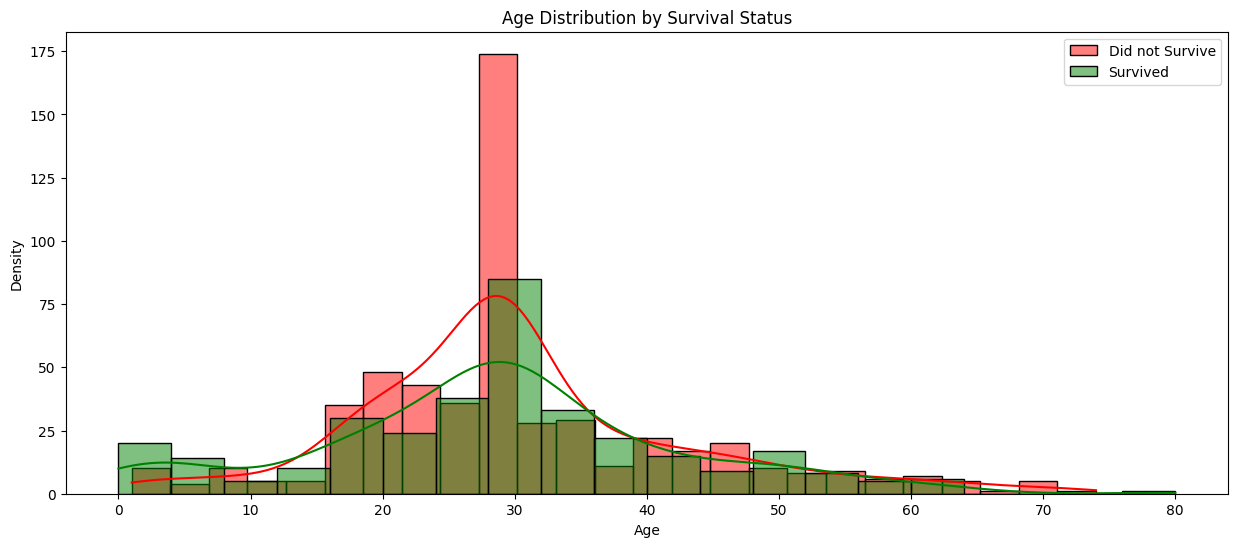

In [232]:
# Setting the figure size
plt.figure(figsize=(15,6))

# Plotting the distribution of 'Age' for those who did not survive (Survived == 0)
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Did not Survive')

# Plotting the distribution of 'Age' for those who survived (Survived == 1)
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')

# Adding labels and title
plt.legend()
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()

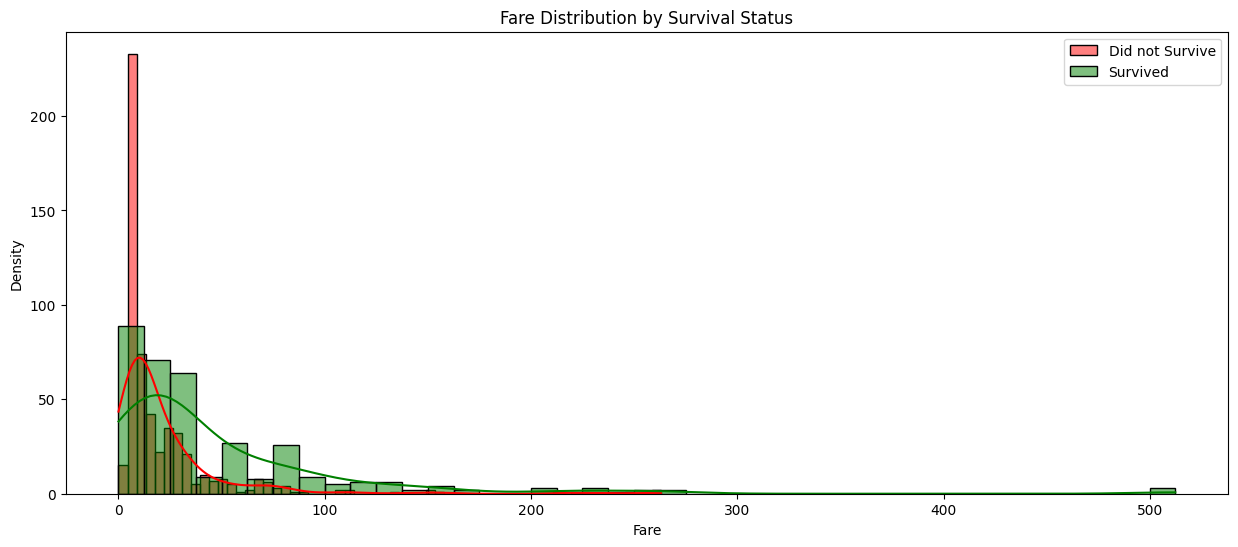

In [233]:
# Setting the figure size
plt.figure(figsize=(15,6))

# Plotting the distribution of 'Fare' for those who did not survive (Survived == 0)
sns.histplot(df[df['Survived'] == 0]['Fare'], kde=True, color='red', label='Did not Survive')

# Plotting the distribution of 'Fare' for those who survived (Survived == 1)
sns.histplot(df[df['Survived'] == 1]['Fare'], kde=True, color='green', label='Survived')

# Adding labels and title
plt.legend()
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')

# Show the plot
plt.show()

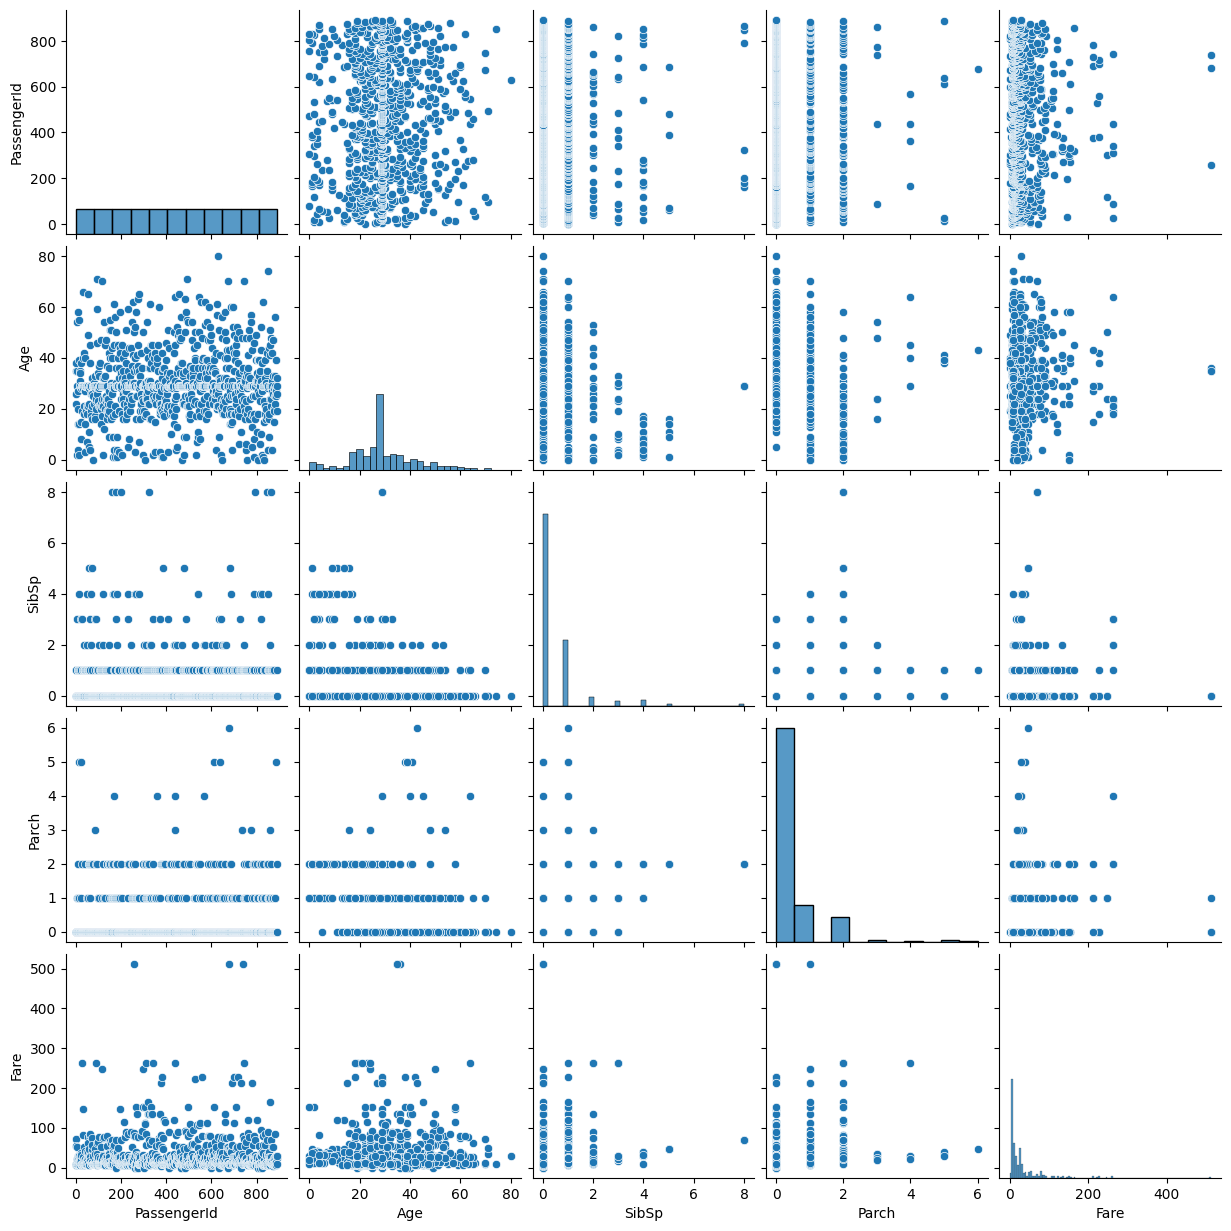

In [234]:
sns.pairplot(df)

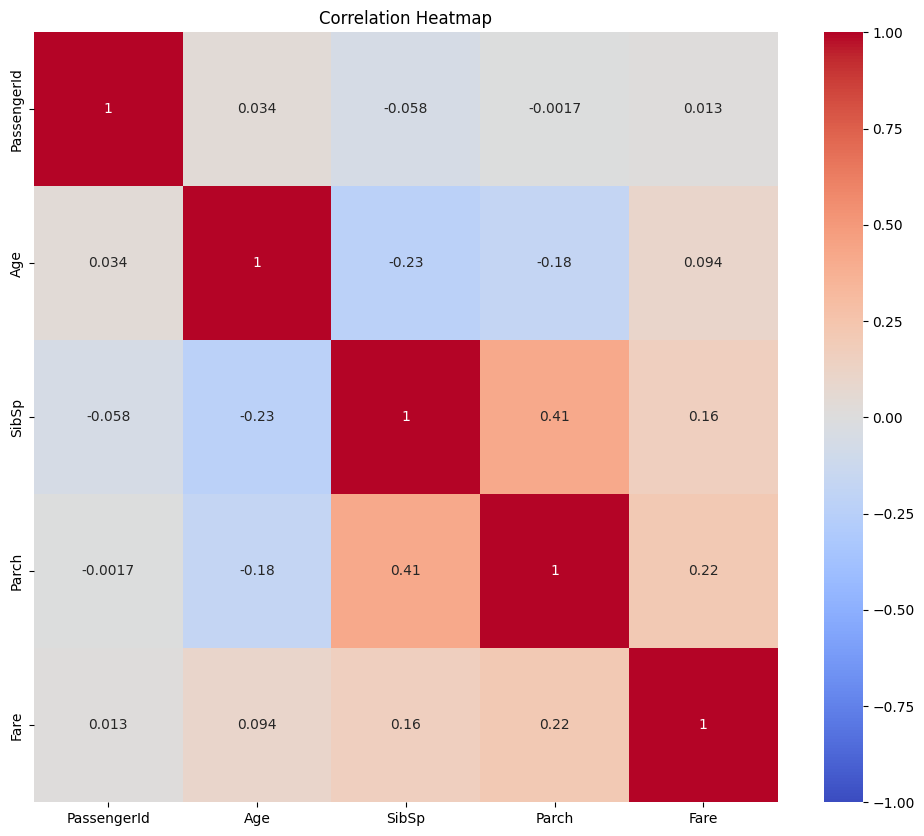

In [235]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [236]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [237]:
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29,0,2,2650,15.2458,C,2
589,590,0,3,"Murdlin, Mr. Joseph",male,29,0,0,A./5. 3235,8.0500,S,0
176,177,0,3,"Lefebre, Master. Henry Forbes",male,29,3,1,4133,25.4667,S,4
404,405,0,3,"Oreskovic, Miss. Marija",female,20,0,0,315096,8.6625,S,0
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21,0,0,350029,7.8542,S,0


In [238]:

# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [239]:
df['family_type']=df['family_size'].apply(family_type)


In [240]:
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52,1,1,12749,93.50,S,2,Medium
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59,0,0,237442,13.50,S,0,Alone
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27,1,0,11668,21.00,S,1,Medium
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24,1,0,STON/O2. 3101279,15.85,S,1,Medium
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33,0,0,345780,9.50,S,0,Alone


In [241]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [242]:
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
537,538,1,1,"LeRoy, Miss. Bertha",female,30,PC 17761,106.4250,C,Alone
797,798,1,3,"Osman, Mrs. Mara",female,31,349244,8.6833,S,Alone
404,405,0,3,"Oreskovic, Miss. Marija",female,20,315096,8.6625,S,Alone
476,477,0,2,"Renouf, Mr. Peter Henry",male,34,31027,21.0000,S,Medium
792,793,0,3,"Sage, Miss. Stella Anna",female,29,CA. 2343,69.5500,S,Large


In [243]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


**Detecting outliers**

**Numerical Data**

1. if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
2. if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
   
**Categorical data**
1. If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [244]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [245]:

# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [246]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [247]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)


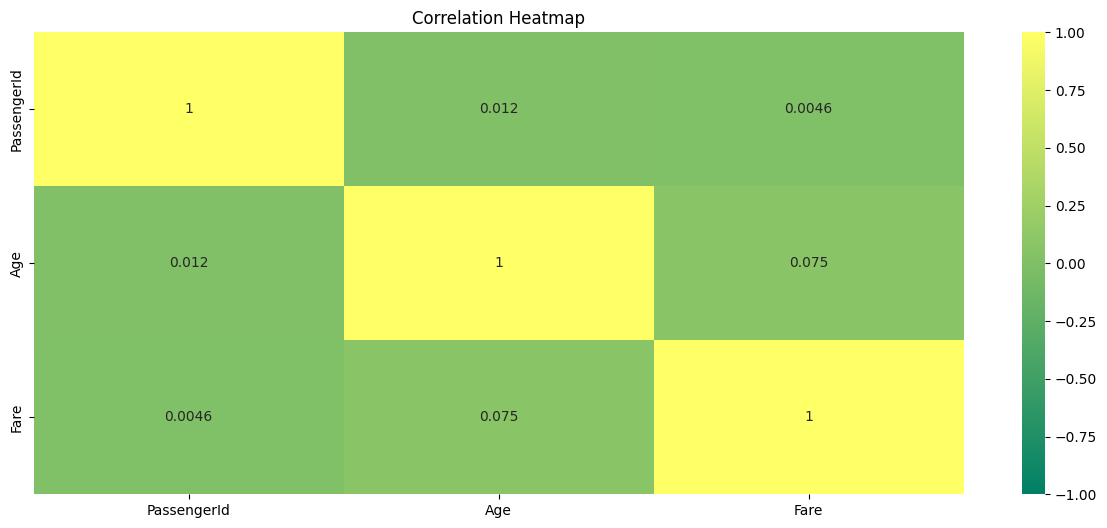

In [248]:

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, cmap='summer', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()